In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Credit-Risk-Modelling/Datasets/archive (1).zip',
                 compression='zip')
df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6741,22,24000,RENT,6.0,DEBTCONSOLIDATION,B,7125,9.67,0,0.30,N,3
31523,42,100000,MORTGAGE,7.0,EDUCATION,C,5000,14.26,0,0.05,Y,15
9996,24,65000,MORTGAGE,2.0,EDUCATION,D,20000,14.09,0,0.31,Y,3
25112,29,36000,RENT,6.0,VENTURE,A,12000,7.49,1,0.33,N,7
5594,25,45000,MORTGAGE,0.0,VENTURE,B,7500,10.39,0,0.17,N,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
# percentage of loans defaults.
df['loan_status'].value_counts() / len(df) * 100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

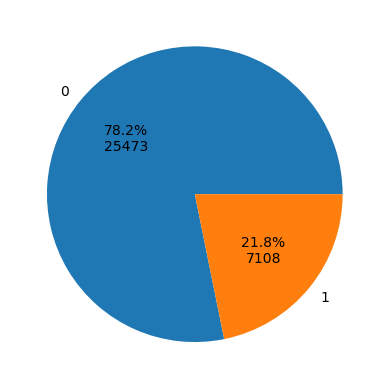

In [9]:
total = df['loan_status'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['loan_status'].value_counts().values, labels=df['loan_status'].value_counts().index, autopct=fmt)
plt.show()


In [13]:
default = df[df['loan_status'] == 1]

In [15]:
default['loan_grade'].value_counts()

D    2141
B    1701
C    1339
A    1073
E     621
F     170
G      63
Name: loan_grade, dtype: int64

In [17]:
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

<AxesSubplot:ylabel='Frequency'>

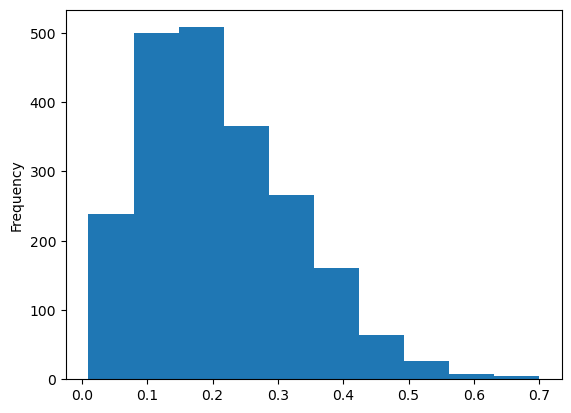

In [23]:
default[default['loan_grade'] == 'D']['loan_percent_income'].plot(kind='hist')